In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
path='/content/drive/My Drive/dataset/Clothing Reviews.csv'
df=pd.read_csv(path)


In [25]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [26]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [27]:
df.drop(["Clothing ID", "Title","Division Name"], axis=1, inplace=True)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,6,Tops,Blouses


In [28]:
df.isnull().sum()

Unnamed: 0                   0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Department Name             14
Class Name                  14
dtype: int64

In [29]:
len(df)

23486

In [30]:
df.describe()

,Unnamed: 0,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,43.198544,4.196032,0.822362,2.535936
std,6779.968547,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
df['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [10]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [32]:
df['Recommended IND'].unique()

array([1, 0])

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

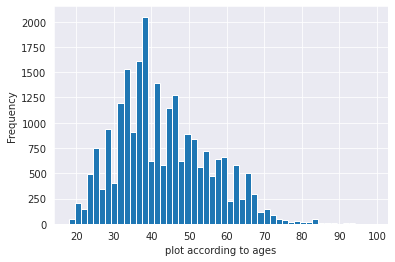

In [34]:
sns.set_style('darkgrid')
ax=df['Age'].plot(bins=50, kind='hist') 
ax.set(xlabel='plot according to ages')
plt.show()

In [13]:
df['Age'].max()

99

In [16]:
df['Age'].mean()

43.198543813335604

In [38]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

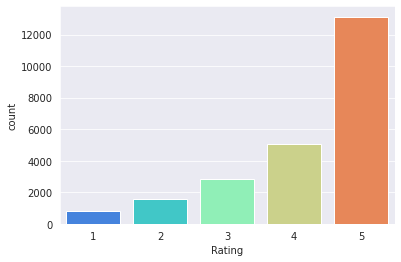

In [18]:
sns.countplot(x='Rating', data=df, palette='rainbow')

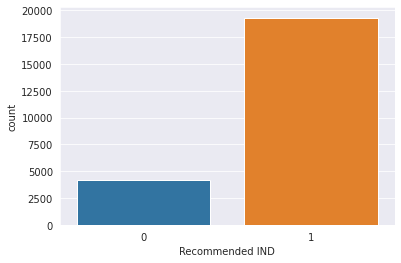

In [36]:
sns.countplot(x="Recommended IND", data=df)

In [39]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

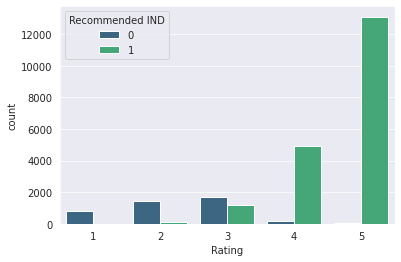

In [41]:
sns.countplot(x='Rating',data=df,hue='Recommended IND',palette='viridis')

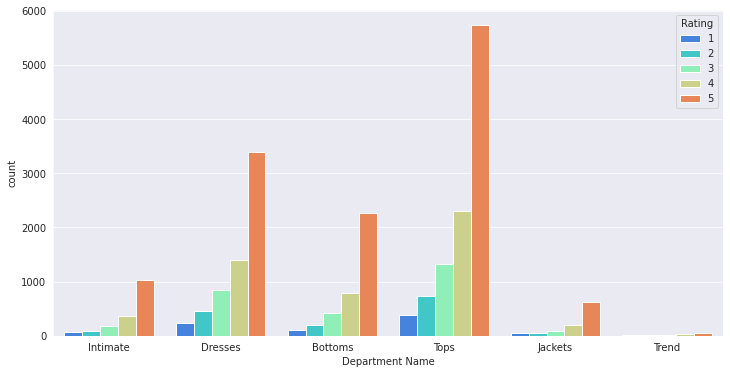

In [45]:
plt.figure(figsize = (12,6))
sns.countplot(x='Department Name',data=df,hue='Rating',palette='rainbow')

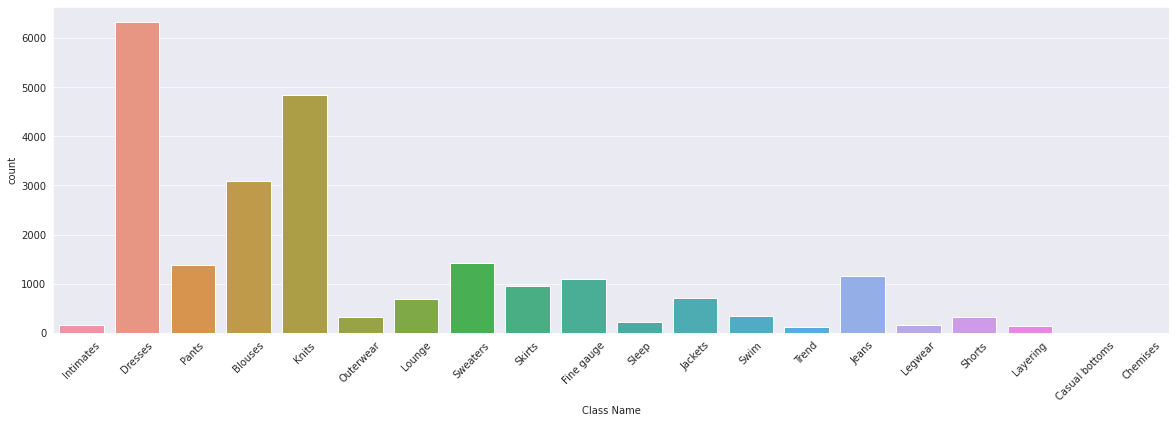

In [46]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Class Name', data = df)
plt.xticks(rotation = 45)
plt.show()

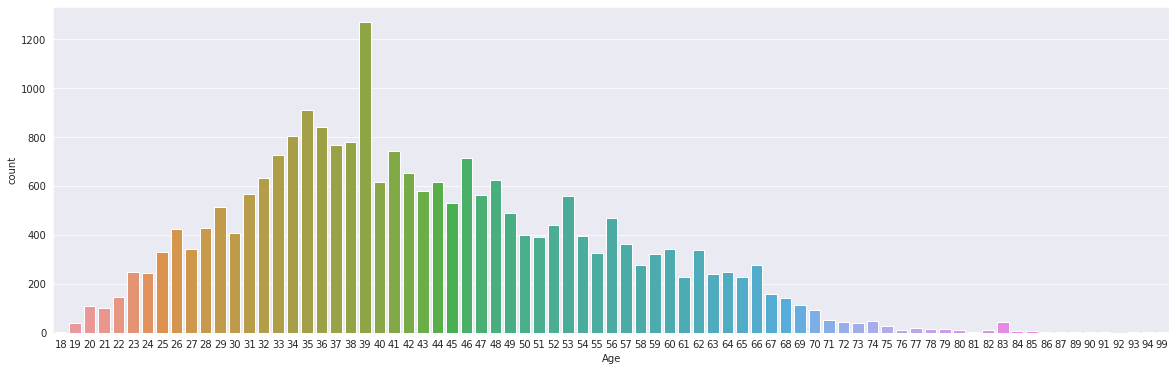

In [44]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Age', data = df)
plt.show()

Sentiment Analysis

In [48]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
df.dtypes

Unnamed: 0                  int64
Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Department Name            object
Class Name                 object
dtype: object

In [56]:
df['Review Text'].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [58]:
df['Review Text'].dtypes

dtype('O')

In [76]:
df["Review Text"].tolist()

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

In [77]:
df = df[~df['Review Text'].isnull()]

In [79]:
df['length']=df['Review Text'].apply(len)

In [80]:
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name,length
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimate,Intimates,53
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,Dresses,500
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,Tops,Blouses,192


Text(0.5, 1.0, 'message length')

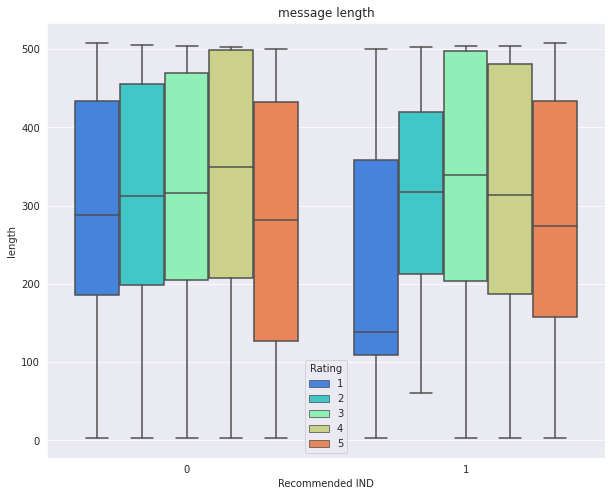

In [88]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Recommended IND',y='length',data=df,hue='Rating',palette='rainbow')
plt.title('message length')

In [89]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review Text']=df['Review Text'].apply(lambda x: remove_punctuation(x))
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name,length
0,0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Intimate,Intimates,53
1,1,34,Love this dress its sooo pretty i happened t...,5,1,4,Dresses,Dresses,303
2,2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,Dresses,500
3,3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,Bottoms,Pants,124
4,4,47,This shirt is very flattering to all due to th...,5,1,6,Tops,Blouses,192


In [81]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', df['Review Text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
print(corpus)


['absolut wonder silki sexi comfort', 'love dress sooo pretti happen find store glad bc never would order onlin bc petit bought petit love length hit littl knee would definit true midi someon truli petit', 'high hope dress realli want work initi order petit small usual size found outrag small small fact could not zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c', 'love love love jumpsuit fun flirti fabul everi time wear get noth great compliment', 'shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt', 'love traci rees dress one not petit feet tall usual wear p brand dress pretti packag lot dress skirt long full overwhelm small frame not stranger alter shorten narrow skirt would take away embellish garment love color idea style not work return dress', 'ade basket hte last mintu see would look like person store pick went


#vectorization

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, -1].values

In [85]:
print(y)

[ 53 303 500 ... 208 427 110]
